In [ ]:
import numpy as np
import matplotlib.pyplot as plt

''' 
Denne python kode beregner bindingsenergien for nuklider baseret på SEMF. 
Men for at kunne udregne bindingsenergien skal vi finde ud af hvilke atomer som er mest stabile. 

Jeg har lavet lidt forhåndsarbejde, hvor jeg har skrevet SEMF ind som kode. 

Det sidste jeg bare mangler er at lave en funktion som kan beregne, hvilke nuklider der er mest stabile. 
Altså jeg vil finde det Z fra et givet A, som giver den største bindingsenergi.

Brug M(Z,A) fra bogen, hvor du skal finde de led som afhænger af z. 

HINT: Du skal måske differentiere lidt ;) 



'''

#konstanter/koefficienter
a_v = 15.8 
a_s = 18.3  
a_c = 0.714
a_a = 23.2
a_p = 12

def pairing_term(A, Z):
    N = A - Z
    if (Z % 2) ^ (N % 2):
        return 0
    elif Z % 2 == 0 and N % 2 == 0:
        return -a_p / A**0.5  
    else:
        return +a_p / A**0.5  

def binding_energy(A, Z):
    volume = a_v * A
    surface = a_s * A**(2/3)
    coulomb = a_c * Z**2 / A**(1/3)
    asymmetry = a_a * (A - 2*Z)**2 / A
    pairing = pairing_term(A, Z)
    delta = -volume + surface + coulomb +  asymmetry +  pairing
    binding_energy = -delta  
    return binding_energy

(0.0, 300.0)

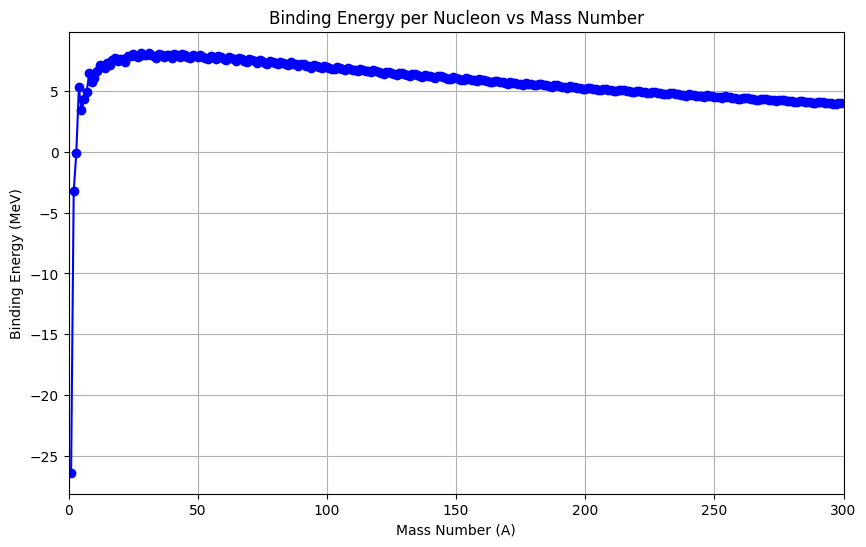

In [ ]:
def stable_z(A):
    Z = #skriv din funktion her <===============================================
    return int(np.ceil(Z))




#Plotter alle forskellige bindingsenergier for forskellige nuklider

A_vals = np.arange(1, 300)
Z_vals = np.array([stable_z(A) for A in A_vals])    


binding_energies = np.array([binding_energy(A, Z)/A for A, Z in zip(A_vals, Z_vals)])
plt.figure(figsize=(10, 6))
plt.plot(A_vals, binding_energies, marker='o', linestyle='-', color='b')
plt.title('Binding Energy per Nucleon vs Mass Number')  
plt.xlabel('Mass Number (A)')
plt.ylabel('Binding Energy (MeV)')
plt.grid()
plt.xlim(0, 300)
    